<a href="https://colab.research.google.com/github/mullerino/Topicos-em-IA/blob/main/lista3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Baixando o conjunto de dados MNIST do repositório fornecido.

In [ ]:
from keras.datasets import mnist

## Dividindo em conjuntos de treinamento e teste

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('There are %d training images.' % len(X_train))
print('There are %d testing images.' % len(X_test))

11490434/11490434 [==============================] - 0s 0us/step
There are 60000 training images.
There are 10000 testing images.


## Normalizando os dados para que todos os valores estejam na faixa de [0, 1]

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing pixel values
X_train = X_train/255
X_test = X_test/255

## Explorando os dados para entender sua estrutura e características.

In [ ]:
print("Formato dos dados de treinamento:")
print("Imagens de treinamento:", X_train.shape)
print("Rótulos de treinamento:", y_train.shape)
print("\nFormato dos dados de teste:")
print("Imagens de teste:", X_test.shape)
print("Rótulos de teste:", y_test.shape)

Formato dos dados de treinamento:
Imagens de treinamento: (60000, 28, 28)
Rótulos de treinamento: (60000,)

Formato dos dados de teste:
Imagens de teste: (10000, 28, 28)
Rótulos de teste: (10000,)


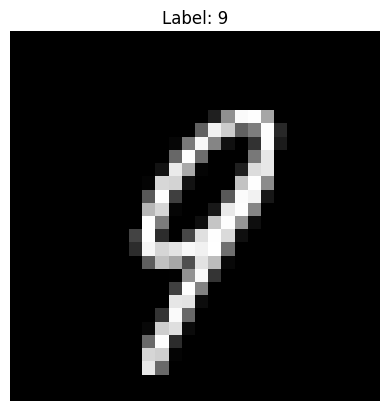

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(X_train[22], cmap='gray')
plt.title("Label: %d" % y_train[22])
plt.axis('off')
plt.show()

##  Implementando o algoritmo K-NN utilizando uma biblioteca de aprendizado de máquina, como Scikit-Learn.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Redimensionar os dados para 2D (flatten)
x_train = X_train.reshape(X_train.shape[0], -1)
x_test = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)

# Inicializar o classificador k-NN
knn = KNeighborsClassifier(n_neighbors=3)

# Treinar o classificador k-NN com os dados de treinamento normalizados
knn.fit(x_train_normalized, y_train)

# Normalizar os dados de teste usando o mesmo scaler
x_test_normalized = scaler.transform(x_test)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(x_test_normalized)

# Calcular a precisão
accuracy = accuracy_score(y_test, y_pred)
print("Precisão do k-NN com dados de treinamento normalizados:", accuracy)

Precisão do k-NN com dados de treinamento normalizados: 0.9452


##  Avaliando o desempenho do modelo usando os dados de teste normalizados,utilizando métricas como precisão, recall e F1-score.

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.93      0.93      0.93       892
           6       0.97      0.97      0.97       958
           7       0.94      0.93      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000



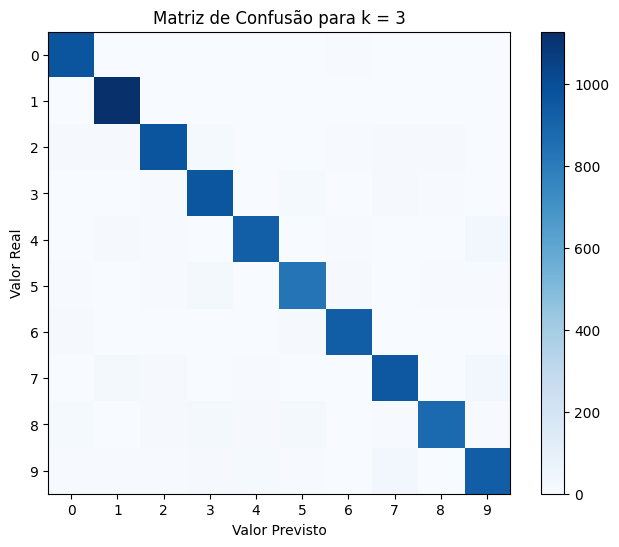

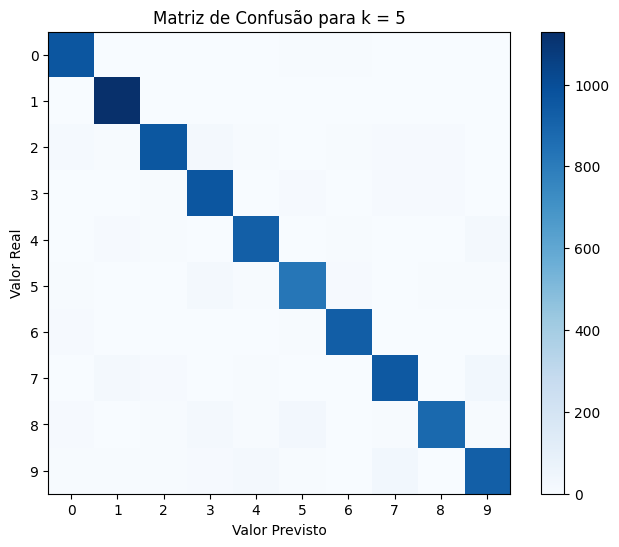

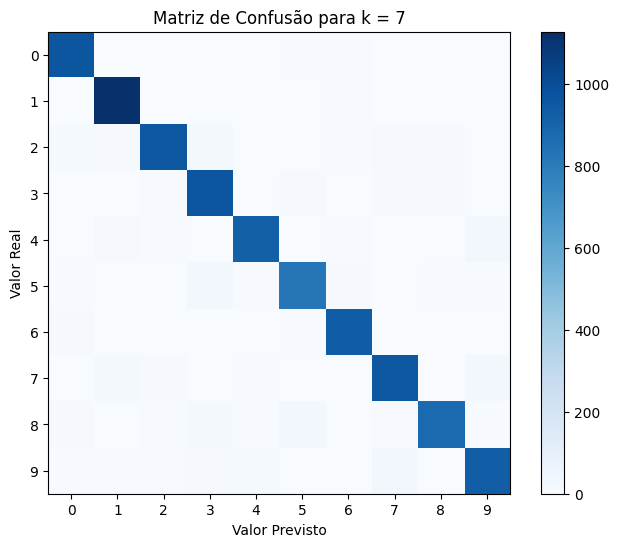

In [ ]:
from sklearn.metrics import confusion_matrix

k_values = [3, 5, 7]

# Percorrer os diferentes valores de k
for k in k_values:
    # Inicializar o classificador k-NN
    knn = KNeighborsClassifier(n_neighbors=k)

    # Treinar o classificador k-NN com os dados de treinamento normalizados
    knn.fit(x_train_normalized, y_train)

    # Normalizar os dados de teste usando o mesmo scaler
    x_test_normalized = scaler.transform(x_test)

    # Fazer previsões no conjunto de teste
    y_pred = knn.predict(x_test_normalized)

    # Calcular a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Plotar a matriz de confusão
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusão para k = {k}')
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, np.arange(10))
    plt.yticks(tick_marks, np.arange(10))
    plt.xlabel('Valor Previsto')
    plt.ylabel('Valor Real')
    plt.show()

O valor de k determina quantos vizinhos serão considerados ao fazer uma previsão para uma nova amostra. Um valor de k muito pequeno pode resultar em um modelo instável e propenso a overfitting, onde ele se ajusta demais aos detalhes específicos dos dados de treinamento, tornando-se sensível ao ruído. Por outro lado, um valor de k muito grande pode suavizar demais a fronteira de decisão entre as classes, levando a um modelo com viés elevado e propenso a underfitting, onde ele ignora estruturas mais finas nos dados.

Quanto ao tamanho dos conjuntos de teste, se forem muito pequenos, a avaliação do modelo pode ser imprecisa e instável devido à alta variância nas estimativas de desempenho. Isso ocorre porque um pequeno conjunto de teste pode não ser representativo o suficiente da distribuição de dados subjacente. Por outro lado, conjuntos de teste muito grandes em relação aos dados de treinamento podem resultar em subutilização dos dados de treinamento, levando a um ajuste menos preciso do modelo e a uma avaliação menos confiável do desempenho.

## Experimentando técnicas de validação cruzada para avaliar a robustez do modelo.

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, x_train_normalized, y_train, cv=5)

# Imprimir as pontuações da validação cruzada
print("Pontuações da validação cruzada k-fold:", cv_scores)
print("Precisão média:", np.mean(cv_scores))

Pontuações da validação cruzada k-fold: [0.93933333 0.941      0.94175    0.93566667 0.94558333]
Precisão média: 0.9406666666666667
